## Notebook for assigning electrolyte score

### Database: GDB-17

**Created on 14th November, 2022; remodified on 12th February, 2024**

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, PandasTools, Fragments, rdMolDescriptors, Descriptors
import numpy as np
from sklearn import preprocessing

In [2]:
%%bash
pwd
ls -ltr

/Users/riteshk/Library/CloudStorage/Box-Box/Research-postdoc/liquid-electrolyte-ML/Science-rev-1/escore-calcs/gdb17
total 1672
-rw-------@ 1 riteshk  staff  91032357 Feb 11 13:32 preds_cond_gdb17_screened.csv
-rw-------@ 1 riteshk  staff  89585492 Feb 11 13:32 preds_oxstab_gdb17_screened.csv
-rw-------@ 1 riteshk  staff  74191989 Feb 11 19:33 preds_ce_gdb17_screened.csv
-rw-------@ 1 riteshk  staff  74191479 Feb 12 11:19 preds_ce_gdb_screened_2M.csv
-rw-------@ 1 riteshk  staff    853153 Feb 12 15:03 assign-electrolyte-score_3.ipynb


In [13]:
df_gdb = pd.read_csv('preds_cond_gdb17_screened.csv')
df_gdb

,solv_comb_sm,salt_sm,conductivity_log,conductivity_log_ensemble_uncal_var
0,CC(=O)C12CC1OC2=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.151876,0.058463
1,CCOCC(CC)C#N,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.914163,0.004366
2,CCC1(OCC11CO1)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.526627,0.007883
3,CC1(C)CCOC1C#N,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.850905,0.005422
4,CC12OC3CC1OC23C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.359172,0.013019
...,...,...,...,...
899361,CCS(=O)(=O)C(CC1CC1)C(C)S(=O)(=O)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-2.272142,0.027504
899362,CCC(CC(S(C)(=O)=O)S(=O)(=O)CC)C1CC1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-1.906449,0.046999
899363,CCC(C)S(=O)(=O)C(C)S(=O)(=O)C1CCCC1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-2.064874,0.106745
899364,ClC1=NSC(Cl)=C2SC(=O)C(C3CCCC3)=C12,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.741449,0.081671


In [14]:
df_gdb_ce = pd.read_csv('preds_ce_gdb_screened_2M.csv')
df_gdb_ce

,solv_comb_sm,salt_sm,log(1-CE)
0,CC(=O)C12CC1OC2=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-1.376818
1,CCOCC(CC)C#N,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-1.871282
2,CCC1(OCC11CO1)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-1.639873
3,CC1(C)CCOC1C#N,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-1.794557
4,CC12OC3CC1OC23C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-1.693352
...,...,...,...
899361,CCS(=O)(=O)C(CC1CC1)C(C)S(=O)(=O)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-1.737120
899362,CCC(CC(S(C)(=O)=O)S(=O)(=O)CC)C1CC1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-1.405236
899363,CCC(C)S(=O)(=O)C(C)S(=O)(=O)C1CCCC1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-1.208755
899364,ClC1=NSC(Cl)=C2SC(=O)C(C3CCCC3)=C12,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-1.486740


In [57]:
df_gdb_ce.sort_values(by='log(1-CE)', ascending=True)

,solv_comb_sm,salt_sm,log(1-CE)
6387,CC(OC=O)C(=O)C(=O)C(=O)C(=O)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-2.838631
2426,CCCOC(C)C(=O)C(=O)C(=O)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-2.627829
75400,CC1COC(C)(C)C(O1)C(=O)C(=O)C(=O)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-2.542977
235782,CC1=NC(=CC2=NC(=O)N=C2C(C=O)=N1)C#N,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-2.539960
177857,CCC1C(C)OC2OC1C(=O)C(=O)C(=O)C2=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-2.535167
...,...,...,...
782171,CC12CC11COCC1S(=O)(=O)N(C=O)S2(=O)=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.702317
878952,CC(=O)N1S(=O)(=O)C2CS(=O)(=O)C(O2)S1(=O)=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.700967
800906,CC1OS(=O)(=O)N(S(=O)(=O)CC=O)S1(=O)=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.673411
67731,CC1CCOC(=O)N1C(C=O)(C(C)=O)C(C)=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.651364


In [15]:
df_gdb_os = pd.read_csv('preds_oxstab_gdb17_screened.csv')
df_gdb_os

,solv_comb_sm,salt_sm,IE,IE_ensemble_uncal_var
0,CC(=O)C12CC1OC2=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,7.093342,0.082988
1,CCOCC(CC)C#N,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,6.237082,0.005810
2,CCC1(OCC11CO1)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,6.240210,0.037827
3,CC1(C)CCOC1C#N,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,6.393649,0.022148
4,CC12OC3CC1OC23C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,6.452776,0.091467
...,...,...,...,...
899361,CCS(=O)(=O)C(CC1CC1)C(C)S(=O)(=O)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,6.303138,0.023157
899362,CCC(CC(S(C)(=O)=O)S(=O)(=O)CC)C1CC1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,6.129133,0.023312
899363,CCC(C)S(=O)(=O)C(C)S(=O)(=O)C1CCCC1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,6.052868,0.020353
899364,ClC1=NSC(Cl)=C2SC(=O)C(C3CCCC3)=C12,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,4.992595,0.015242


In [10]:
## reading original datasets
df_cond = pd.read_csv('../all_multi_comp_cond_comm.csv')
df_cond['conductivity'] = np.power(10, df_cond['conductivity_log'])
cond = df_cond['conductivity']
df_os = pd.read_csv('../all_oxstab.csv')
oxstab = df_os['IE']
df_ce = pd.read_csv('../all_multi_comp_ce.csv')
ce = df_ce['coulombic_efficiency']
df_ce

,solvent_1_smiles,solvent_2_smiles,solvent_3_smiles,salt_1_smiles,salt_2_smiles,additive_smiles,protocol,current_density,coulombic_efficiency
0,CC1COC(=O)O1,NaN,NaN,[Li+].[O-][Cl+3]([O-])([O-])[O-],NaN,NaN,0,2.0,0.80000
1,CC1COC(=O)O1,NaN,NaN,[Li+].[O-][Cl+3]([O-])([O-])[O-],NaN,O=S=O,1,5.0,0.83600
2,C1CCOC1,NaN,NaN,F[As-](F)(F)(F)(F)F.[Li+],NaN,NaN,1,5.0,0.89400
3,CC1CCCO1,NaN,NaN,F[As-](F)(F)(F)(F)F.[Li+],NaN,NaN,1,0.9,0.97400
4,CC1CCCO1,NaN,NaN,F[As-](F)(F)(F)(F)F.[Li+],NaN,NaN,1,0.9,0.97400
...,...,...,...,...,...,...,...,...,...
137,CO[Si](C)(C)OC,NaN,NaN,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],NaN,NaN,2,0.5,0.99759
138,O=S1(=O)CCCC1,NaN,NaN,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],NaN,NaN,2,0.5,0.98200
139,O=S1(=O)CCCC1,FC(F)C(F)(F)COC(F)(F)C(F)F,NaN,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],NaN,NaN,2,0.5,0.98800
140,COC1OCC(C(F)(F)F)O1,NaN,NaN,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],NaN,NaN,2,1.0,0.98700


In [11]:
## Extremum values of all original datasets
print(max(cond), min(cond))
print(max(oxstab), min(oxstab))
print(max(ce), min(ce))

66.79000001752941 1.790000001979125e-07
11.03454344 0.027343104
0.9994000000001512 0.0899999995711704


In [16]:
df_gdb['conductivity'] = np.power(10, df_gdb['conductivity_log'])
df_gdb['coulombic_efficiency'] = 1 - np.power(10, df_gdb_ce['log(1-CE)'])
df_gdb['oxstab'] = df_gdb_os['IE']
df_gdb

,solv_comb_sm,salt_sm,conductivity_log,conductivity_log_ensemble_uncal_var,conductivity,coulombic_efficiency,oxstab
0,CC(=O)C12CC1OC2=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.151876,0.058463,0.704895,0.958007,7.093342
1,CCOCC(CC)C#N,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.914163,0.004366,8.206602,0.986550,6.237082
2,CCC1(OCC11CO1)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.526627,0.007883,3.362226,0.977085,6.240210
3,CC1(C)CCOC1C#N,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.850905,0.005422,7.094224,0.983951,6.393649
4,CC12OC3CC1OC23C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.359172,0.013019,2.286502,0.979740,6.452776
...,...,...,...,...,...,...,...
899361,CCS(=O)(=O)C(CC1CC1)C(C)S(=O)(=O)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-2.272142,0.027504,0.005344,0.981682,6.303138
899362,CCC(CC(S(C)(=O)=O)S(=O)(=O)CC)C1CC1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-1.906449,0.046999,0.012404,0.960666,6.129133
899363,CCC(C)S(=O)(=O)C(C)S(=O)(=O)C1CCCC1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-2.064874,0.106745,0.008612,0.938163,6.052868
899364,ClC1=NSC(Cl)=C2SC(=O)C(C3CCCC3)=C12,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.741449,0.081671,0.181364,0.967397,4.992595


In [19]:
gdb_cond = df_gdb['conductivity']
gdb_os = df_gdb['oxstab']
gdb_ce = df_gdb['coulombic_efficiency']

In [20]:
## Extreme values of all predicted properties for emolecules dataset
print(max(gdb_cond), min(gdb_cond))
print(max(gdb_os), min(gdb_os))
print(max(gdb_ce), min(gdb_ce))

15.010234379743647 0.00019738965803633675
8.6681745111448 2.6786575926661738
0.99854999554927 0.6410327214643698


**Step 1: Normalization**

In [21]:
## Define a scaler for conductivity
cond_div = np.linspace(max(cond), min(cond),1000000) ## dividing the range into 1 million points
cond_div = cond_div.reshape(-1, 1)
scaler_cond = preprocessing.MinMaxScaler() ## Using MinMax Scaler
scaler_cond.fit(cond_div)
cond_sc = scaler_cond.transform(cond_div)
cond_sc

array([[1.000000e+00],
       [9.999990e-01],
       [9.999980e-01],
       ...,
       [2.000002e-06],
       [1.000001e-06],
       [0.000000e+00]])

In [22]:
## Standardize the original conductivity values
gdb_cond = np.array(gdb_cond).reshape(-1,1)
gdb_cond_sc = scaler_cond.transform(gdb_cond)
print(gdb_cond_sc)
print(max(gdb_cond_sc), min(gdb_cond_sc))

[[0.01055389]
 [0.12287171]
 [0.05034025]
 ...
 [0.00012895]
 [0.00271543]
 [0.00036734]]
[0.22473775] [2.95269739e-06]


In [23]:
## Define a scaler for oxidative stability
os_div = np.linspace(max(oxstab), min(oxstab),1000000).reshape(-1, 1)
scaler_os = preprocessing.MinMaxScaler()
scaler_os.fit(os_div)
scaler_os.transform(os_div)

array([[1.000000e+00],
       [9.999990e-01],
       [9.999980e-01],
       ...,
       [2.000002e-06],
       [1.000001e-06],
       [0.000000e+00]])

In [24]:
## Standardize the original oxidative stability values
gdb_os = np.array(gdb_os).reshape(-1,1)
gdb_os_sc = scaler_os.transform(gdb_os)
print(gdb_os_sc)
print(max(gdb_os_sc), min(gdb_os_sc))

[[0.64194337]
 [0.56415244]
 [0.56443663]
 ...
 [0.54741665]
 [0.45109127]
 [0.52618303]]
[0.78501628] [0.24087092]


In [25]:
## Define a scaler for coulombic efficiency
ce_div = np.linspace(max(ce), min(ce),1000000).reshape(-1, 1)
scaler_ce = preprocessing.MinMaxScaler()
scaler_ce.fit(ce_div)
scaler_ce.transform(ce_div)

array([[1.000000e+00],
       [9.999990e-01],
       [9.999980e-01],
       ...,
       [2.000002e-06],
       [1.000001e-06],
       [0.000000e+00]])

In [26]:
## Standardize the original coulombic efficiency values
gdb_ce = np.array(gdb_ce).reshape(-1,1)
gdb_ce_sc = scaler_ce.transform(gdb_ce)
print(gdb_ce_sc)
print(max(gdb_ce_sc), min(gdb_ce_sc))

[[0.95448265]
 [0.98586995]
 [0.97546143]
 ...
 [0.93266268]
 [0.96480846]
 [0.94012943]]
[0.99906531] [0.60592998]


In [27]:
## Combine the standardized values into a dataframe
target_df = pd.DataFrame()
target_df['solv_comb_sm'] = df_gdb['solv_comb_sm']
target_df['conductivity'] = df_gdb['conductivity']
target_df['oxstab'] = df_gdb['oxstab']
target_df['coulombic_efficiency'] = df_gdb['coulombic_efficiency']
# target_df['similarity'] = emol_max_sim
target_df

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency
0,CC(=O)C12CC1OC2=O,0.704895,7.093342,0.958007
1,CCOCC(CC)C#N,8.206602,6.237082,0.986550
2,CCC1(OCC11CO1)C=O,3.362226,6.240210,0.977085
3,CC1(C)CCOC1C#N,7.094224,6.393649,0.983951
4,CC12OC3CC1OC23C=O,2.286502,6.452776,0.979740
...,...,...,...,...
899361,CCS(=O)(=O)C(CC1CC1)C(C)S(=O)(=O)C=O,0.005344,6.303138,0.981682
899362,CCC(CC(S(C)(=O)=O)S(=O)(=O)CC)C1CC1,0.012404,6.129133,0.960666
899363,CCC(C)S(=O)(=O)C(C)S(=O)(=O)C1CCCC1,0.008612,6.052868,0.938163
899364,ClC1=NSC(Cl)=C2SC(=O)C(C3CCCC3)=C12,0.181364,4.992595,0.967397


In [28]:
target_df['cond_std'] = gdb_cond_sc
target_df['oxstab_std'] = gdb_os_sc
target_df['CE_std'] = gdb_ce_sc

In [30]:
# target_df[['conductivity','cond_std']]

,conductivity,cond_std
0,0.704895,0.010554
1,8.206602,0.122872
2,3.362226,0.050340
3,7.094224,0.106217
4,2.286502,0.034234
...,...,...
899361,0.005344,0.000080
899362,0.012404,0.000186
899363,0.008612,0.000129
899364,0.181364,0.002715


1. Equal weights for $\sigma$, CE, & IE

In [31]:
cond_score_1 = []
os_score_1 = []
ce_score_1 = []
cond_wt = 0.33
os_wt = 0.33
ce_wt = 0.33
for i in range(len(df_gdb)):
    if df_gdb['conductivity'][i] >= 1.0 and df_gdb['oxstab'][i] >= 4.5 and df_gdb['coulombic_efficiency'][i] >= 0.985:
        cond_score_1.append(cond_wt * target_df['cond_std'][i])
        os_score_1.append(os_wt * target_df['oxstab_std'][i])
        ce_score_1.append(ce_wt * target_df['CE_std'][i])
    else:
        cond_score_1.append(0.0)
        os_score_1.append(0.0)
        ce_score_1.append(0.0)

In [32]:
overall_score_1 = [(cond_score_1[i]+os_score_1[i]+ce_score_1[i]) for i in range(len(df_gdb))]

In [33]:
target_df['overall_score_1'] = overall_score_1
high_score_df_1 = target_df.loc[target_df['overall_score_1'] > 0.0]
high_score_df_1_ = high_score_df_1.sort_values(by=['overall_score_1'], ascending=False)
high_score_df_1_.reset_index(drop=True, inplace=True)
high_score_df_1_

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std,overall_score_1
0,CC(=O)OC(C)(C#N)C#N,15.010234,7.476739,0.987888,0.224738,0.676775,0.987341,0.623322
1,CC1OC(C=O)(C#N)C(C)(OC1=O)C#N,5.635065,7.882620,0.986719,0.084370,0.713649,0.986055,0.588744
2,CC1CC(OC(=O)C#N)(OC(=O)O1)C(=O)C=O,1.607674,8.487936,0.987321,0.024071,0.768642,0.986718,0.587212
3,CCC1(OC(C#N)C(=O)O1)S(=O)(=O)C=O,2.987550,8.154854,0.990586,0.044731,0.738381,0.990308,0.585228
4,CCC1(OC(=O)C#N)OC(=O)CC1C(=O)C=O,1.109743,8.382008,0.987587,0.016615,0.759018,0.987010,0.581672
...,...,...,...,...,...,...,...,...
2694,CCN(C)C(C)(C)C1(OC1C=O)C(C)C,1.003044,4.523889,0.985860,0.015018,0.408509,0.985111,0.464851
2695,CC1CCC(C#N)C(C)N(C)C1CC(F)(F)F,1.133666,4.505066,0.985332,0.016974,0.406799,0.984530,0.464740
2696,CC(C)(C)N1C2CCC(C)(COC=O)CC12,1.106981,4.505338,0.985600,0.016574,0.406824,0.984825,0.464714
2697,CCC1OC(C)(C)C2OCCC2CC1(C)C,1.016106,4.514589,0.985098,0.015213,0.407665,0.984273,0.464360


In [34]:
PandasTools.AddMoleculeColumnToFrame(high_score_df_1_, smilesCol='solv_comb_sm')
high_score_df_1_.head()

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std,overall_score_1,ROMol
0,CC(=O)OC(C)(C#N)C#N,15.010234,7.476739,0.987888,0.224738,0.676775,0.987341,0.623322,<rdkit.Chem.rdchem.Mol object at 0x2bbf357b0>
1,CC1OC(C=O)(C#N)C(C)(OC1=O)C#N,5.635065,7.882620,0.986719,0.084370,0.713649,0.986055,0.588744,<rdkit.Chem.rdchem.Mol object at 0x2bbf35430>
2,CC1CC(OC(=O)C#N)(OC(=O)O1)C(=O)C=O,1.607674,8.487936,0.987321,0.024071,0.768642,0.986718,0.587212,<rdkit.Chem.rdchem.Mol object at 0x2bbf35200>
3,CCC1(OC(C#N)C(=O)O1)S(=O)(=O)C=O,2.987550,8.154854,0.990586,0.044731,0.738381,0.990308,0.585228,<rdkit.Chem.rdchem.Mol object at 0x2bbf35270>
4,CCC1(OC(=O)C#N)OC(=O)CC1C(=O)C=O,1.109743,8.382008,0.987587,0.016615,0.759018,0.987010,0.581672,<rdkit.Chem.rdchem.Mol object at 0x2bbf350b0>


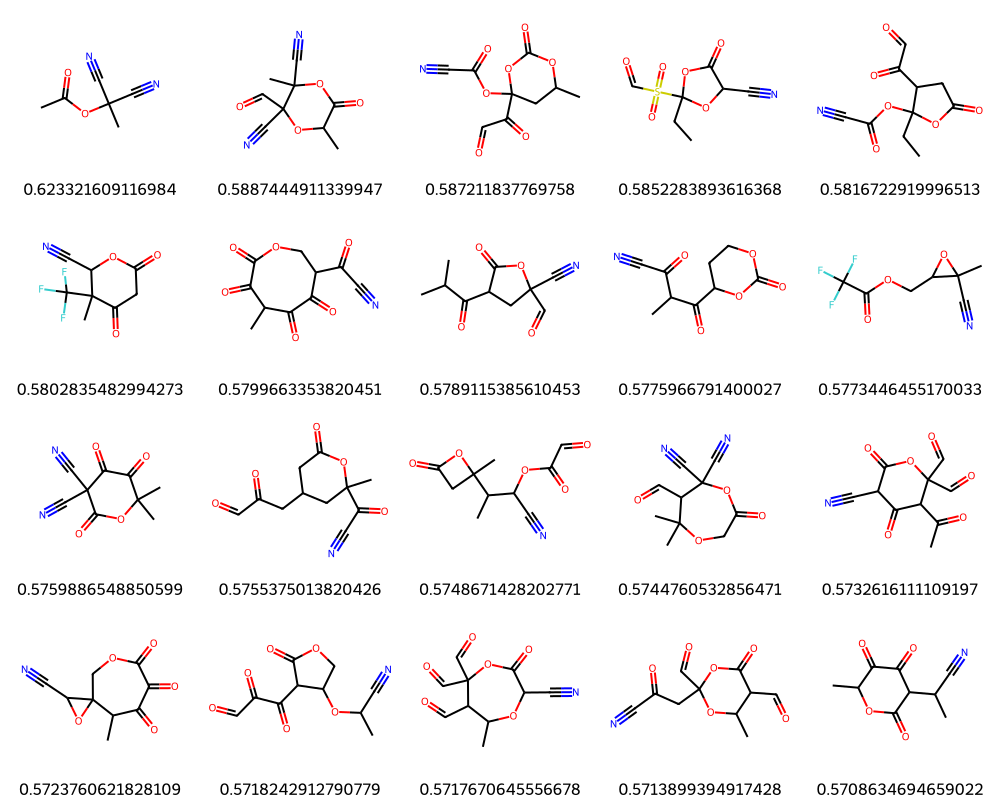

In [35]:
PandasTools.FrameToGridImage(high_score_df_1_.iloc[:20,:], legendsCol="overall_score_1", molsPerRow=5)

In [36]:
high_score_df_1_.to_csv('gdb_high_overall_score_wt1.csv', index=False)

2. Very low weights for $\sigma$ & CE; very high weight for IE

In [37]:
cond_score_2 = []
os_score_2 = []
ce_score_2 = []
cond_wt = 0.05
os_wt = 0.9
ce_wt = 0.05
for i in range(len(df_gdb)):
    if df_gdb['conductivity'][i] >= 1.0 and df_gdb['oxstab'][i] >= 4.5 and df_gdb['coulombic_efficiency'][i] >= 0.985:
        cond_score_2.append(cond_wt * target_df['cond_std'][i])
        os_score_2.append(os_wt * target_df['oxstab_std'][i])
        ce_score_2.append(ce_wt * target_df['CE_std'][i])
    else:
        cond_score_2.append(0.0)
        os_score_2.append(0.0)
        ce_score_2.append(0.0)

In [38]:
overall_score_2 = [(cond_score_2[i]+os_score_2[i]+ce_score_2[i]) for i in range(len(df_gdb))]

In [39]:
target_df['overall_score_2'] = overall_score_2
high_score_df_2 = target_df.loc[target_df['overall_score_2'] > 0.0]
high_score_df_2_ = high_score_df_2.sort_values(by=['overall_score_2'], ascending=False)
high_score_df_2_.reset_index(drop=True, inplace=True)
high_score_df_2_

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std,overall_score_1,overall_score_2
0,CC1CC(OC(=O)C#N)(OC(=O)O1)C(=O)C=O,1.607674,8.487936,0.987321,0.024071,0.768642,0.986718,0.587212,0.742317
1,CCC1(OC(=O)C#N)OC(=O)CC1C(=O)C=O,1.109743,8.382008,0.987587,0.016615,0.759018,0.987010,0.581672,0.733298
2,CC(C(=O)C#N)C(=O)C1CCOC(=O)O1,1.113463,8.274032,0.985225,0.016671,0.749209,0.984413,0.577597,0.724342
3,CC1(C(OC(=O)CC1=O)C#N)C(F)(F)F,1.502209,8.268433,0.987799,0.022492,0.748700,0.987244,0.580284,0.724317
4,CC1C(=O)C(=O)OCC(C(=O)C#N)C(=O)C1=O,1.991756,8.176568,0.987849,0.029821,0.740354,0.987299,0.579966,0.717175
...,...,...,...,...,...,...,...,...,...
2694,CCC(C)C1CC(=O)N(C1CC)C(C)(C)C,1.394059,4.505900,0.986568,0.020872,0.406875,0.985890,0.466500,0.416526
2695,CC(C)(C)N1C2CCC(C)(COC=O)CC12,1.106981,4.505338,0.985600,0.016574,0.406824,0.984825,0.464714,0.416212
2696,CC1CCC(C#N)C(C)N(C)C1CC(F)(F)F,1.133666,4.505066,0.985332,0.016974,0.406799,0.984530,0.464740,0.416195
2697,CCC(OC)C1(C)OC(C)(C)C(C)OCC1C,1.388379,4.500540,0.988405,0.020787,0.406388,0.987909,0.466978,0.416184


In [40]:
PandasTools.AddMoleculeColumnToFrame(high_score_df_2_, smilesCol='solv_comb_sm')
high_score_df_2_.head()

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std,overall_score_1,overall_score_2,ROMol
0,CC1CC(OC(=O)C#N)(OC(=O)O1)C(=O)C=O,1.607674,8.487936,0.987321,0.024071,0.768642,0.986718,0.587212,0.742317,<rdkit.Chem.rdchem.Mol object at 0x2bbefdba0>
1,CCC1(OC(=O)C#N)OC(=O)CC1C(=O)C=O,1.109743,8.382008,0.987587,0.016615,0.759018,0.987010,0.581672,0.733298,<rdkit.Chem.rdchem.Mol object at 0x2bbefd3c0>
2,CC(C(=O)C#N)C(=O)C1CCOC(=O)O1,1.113463,8.274032,0.985225,0.016671,0.749209,0.984413,0.577597,0.724342,<rdkit.Chem.rdchem.Mol object at 0x2be9e3580>
3,CC1(C(OC(=O)CC1=O)C#N)C(F)(F)F,1.502209,8.268433,0.987799,0.022492,0.748700,0.987244,0.580284,0.724317,<rdkit.Chem.rdchem.Mol object at 0x2be9e3270>
4,CC1C(=O)C(=O)OCC(C(=O)C#N)C(=O)C1=O,1.991756,8.176568,0.987849,0.029821,0.740354,0.987299,0.579966,0.717175,<rdkit.Chem.rdchem.Mol object at 0x2be9dcdd0>


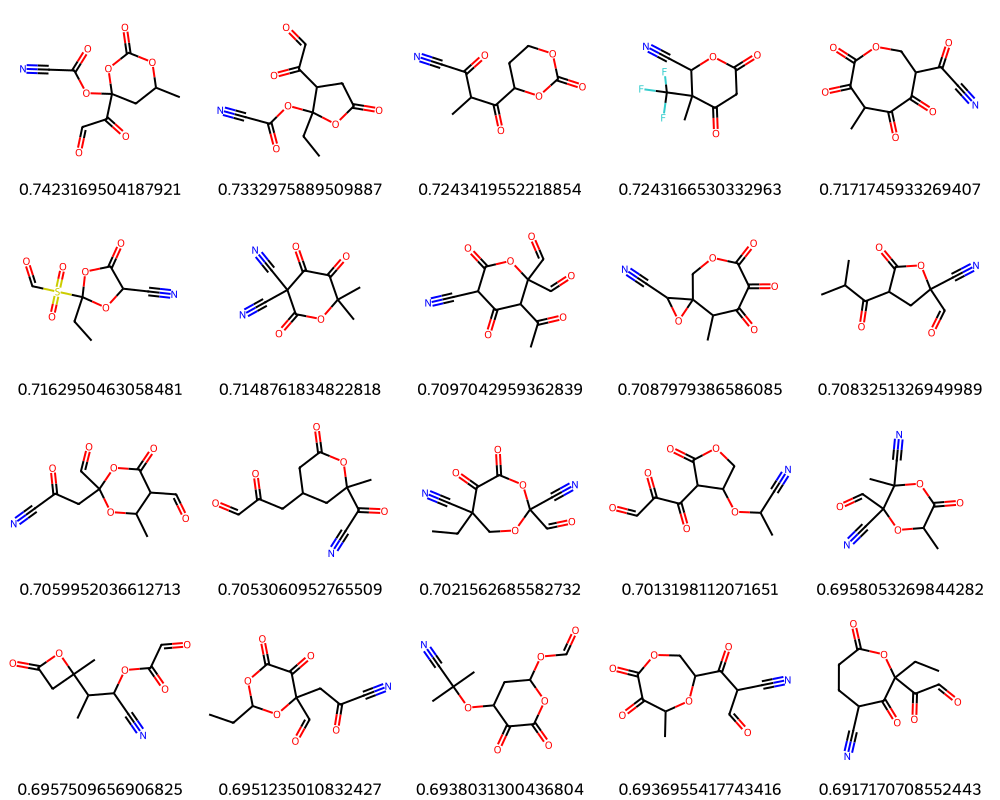

In [41]:
PandasTools.FrameToGridImage(high_score_df_2_.iloc[:20,:], legendsCol="overall_score_2", molsPerRow=5)

In [42]:
high_score_df_2_.drop(labels=['ROMol','overall_score_1'], axis=1, inplace=True)
high_score_df_2_.reset_index(drop=True, inplace=True)
high_score_df_2_.to_csv('gdb_high_overall_score_wt2.csv')

3. Very low weights for $\sigma$ & IE; very high weight for CE

In [43]:
cond_score_3 = []
os_score_3 = []
ce_score_3 = []
cond_wt = 0.05
os_wt = 0.05
ce_wt = 0.9
for i in range(len(df_gdb)):
    if df_gdb['conductivity'][i] >= 1.0 and df_gdb['oxstab'][i] >= 4.5 and df_gdb['coulombic_efficiency'][i] >= 0.985:
        cond_score_3.append(cond_wt * target_df['cond_std'][i])
        os_score_3.append(os_wt * target_df['oxstab_std'][i])
        ce_score_3.append(ce_wt * target_df['CE_std'][i])
    else:
        cond_score_3.append(0.0)
        os_score_3.append(0.0)
        ce_score_3.append(0.0)

In [44]:
overall_score_3 = [(cond_score_3[i]+os_score_3[i]+ce_score_3[i]) for i in range(len(df_gdb))]

In [45]:
target_df['overall_score_3'] = overall_score_3
high_score_df_3 = target_df.loc[target_df['overall_score_3'] > 0.0]
high_score_df_3_ = high_score_df_3.sort_values(by=['overall_score_3'], ascending=False)
high_score_df_3_.reset_index(drop=True, inplace=True)
high_score_df_3_

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std,overall_score_1,overall_score_2,overall_score_3
0,CC(=O)OC(C)(C#N)C#N,15.010234,7.476739,0.987888,0.224738,0.676775,0.987341,0.623322,0.669701,0.933682
1,CC1(C)OC(OC1C#N)(C=O)C(=O)C=O,1.025601,7.471784,0.995713,0.015356,0.676325,0.995945,0.556917,0.659257,0.930935
2,CC1CC(OC(=O)C(=O)C1(C)C#N)C(=O)C=O,1.683971,7.836715,0.993286,0.025213,0.709479,0.993277,0.570229,0.689455,0.930684
3,CCC1(OC(C#N)C(=O)O1)S(=O)(=O)C=O,2.987550,8.154854,0.990586,0.044731,0.738381,0.990308,0.585228,0.716295,0.930432
4,CC1OC(C#N)C(=O)OC1C(=O)C=O,1.473488,7.797129,0.991793,0.022062,0.705882,0.991636,0.567461,0.685979,0.928869
...,...,...,...,...,...,...,...,...,...,...
2694,CC1CCC(C#N)C(C)N(C)C1CC(F)(F)F,1.133666,4.505066,0.985332,0.016974,0.406799,0.984530,0.464740,0.416195,0.907266
2695,CC(C)C(=O)N1C(C)C2(C)CC1C(C)(C)CO2,1.129791,4.528733,0.985163,0.016916,0.408950,0.984345,0.465369,0.418118,0.907204
2696,CCN(C)C(C(C)OC=O)C(C)(CC)CC=O,1.035305,4.557633,0.985056,0.015501,0.411575,0.984227,0.465730,0.420404,0.907158
2697,CCCOC(C)(C)C1OC(C)(C)C(C)C1CC,1.027615,4.501941,0.985298,0.015386,0.406516,0.984493,0.464110,0.415858,0.907139


In [46]:
PandasTools.AddMoleculeColumnToFrame(high_score_df_3_, smilesCol='solv_comb_sm')
high_score_df_3_.head()

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std,overall_score_1,overall_score_2,overall_score_3,ROMol
0,CC(=O)OC(C)(C#N)C#N,15.010234,7.476739,0.987888,0.224738,0.676775,0.987341,0.623322,0.669701,0.933682,<rdkit.Chem.rdchem.Mol object at 0x2be9eab30>
1,CC1(C)OC(OC1C#N)(C=O)C(=O)C=O,1.025601,7.471784,0.995713,0.015356,0.676325,0.995945,0.556917,0.659257,0.930935,<rdkit.Chem.rdchem.Mol object at 0x2be9ea510>
2,CC1CC(OC(=O)C(=O)C1(C)C#N)C(=O)C=O,1.683971,7.836715,0.993286,0.025213,0.709479,0.993277,0.570229,0.689455,0.930684,<rdkit.Chem.rdchem.Mol object at 0x2c497a900>
3,CCC1(OC(C#N)C(=O)O1)S(=O)(=O)C=O,2.987550,8.154854,0.990586,0.044731,0.738381,0.990308,0.585228,0.716295,0.930432,<rdkit.Chem.rdchem.Mol object at 0x2c497aa50>
4,CC1OC(C#N)C(=O)OC1C(=O)C=O,1.473488,7.797129,0.991793,0.022062,0.705882,0.991636,0.567461,0.685979,0.928869,<rdkit.Chem.rdchem.Mol object at 0x2c497a890>


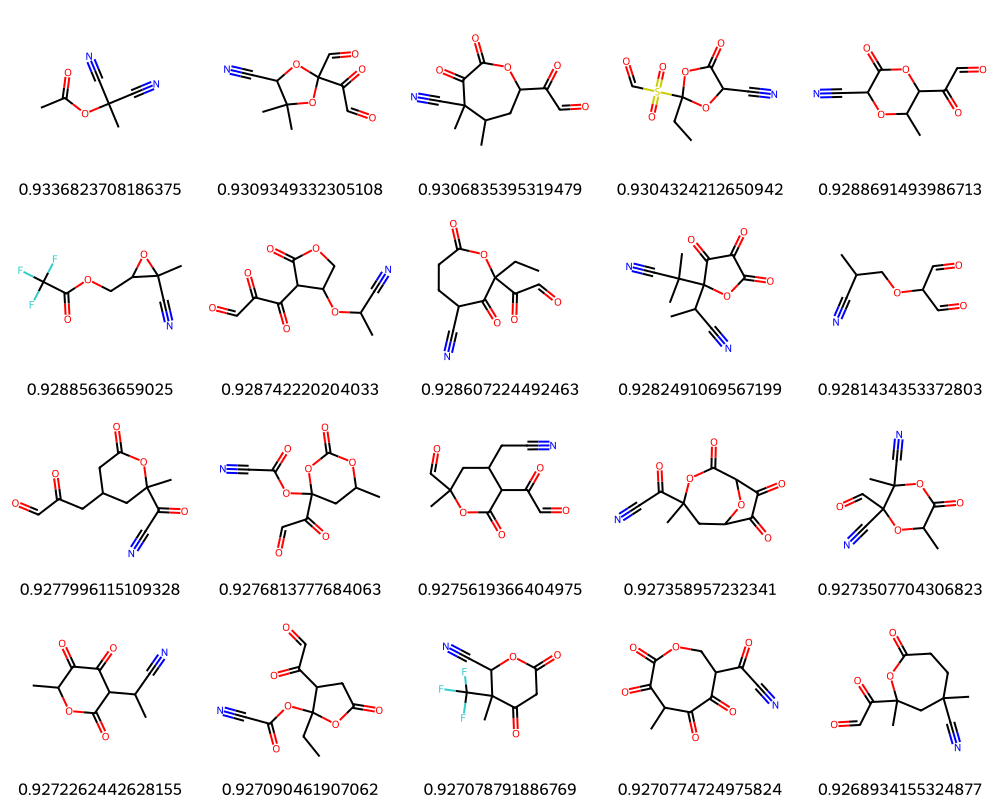

In [47]:
PandasTools.FrameToGridImage(high_score_df_3_.iloc[:20,:], legendsCol="overall_score_3", molsPerRow=5)

In [48]:
high_score_df_3_.drop(labels=['ROMol','overall_score_1','overall_score_2'], axis=1, inplace=True)
high_score_df_3_.reset_index(drop=True, inplace=True)
high_score_df_3_.to_csv('gdb_high_overall_score_wt3.csv')

4. Very low weights for IE & CE; very high weight for $\sigma$

In [49]:
cond_score_4 = []
os_score_4 = []
ce_score_4 = []
cond_wt = 0.9
os_wt = 0.05
ce_wt = 0.05
for i in range(len(df_gdb)):
    if df_gdb['conductivity'][i] >= 1.0 and df_gdb['oxstab'][i] >= 4.5 and df_gdb['coulombic_efficiency'][i] >= 0.985:
        cond_score_4.append(cond_wt * target_df['cond_std'][i])
        os_score_4.append(os_wt * target_df['oxstab_std'][i])
        ce_score_4.append(ce_wt * target_df['CE_std'][i])
    else:
        cond_score_4.append(0.0)
        os_score_4.append(0.0)
        ce_score_4.append(0.0)

In [51]:
overall_score_4 = [(cond_score_4[i]+os_score_4[i]+ce_score_4[i]) for i in range(len(df_gdb))]

In [52]:
target_df['overall_score_4'] = overall_score_4
high_score_df_4 = target_df.loc[target_df['overall_score_4'] > 0.0]
high_score_df_4_ = high_score_df_4.sort_values(by=['overall_score_4'], ascending=False)
high_score_df_4_.reset_index(drop=True, inplace=True)
high_score_df_4_

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std,overall_score_1,overall_score_2,overall_score_3,overall_score_4
0,CC(=O)OC(C)(C#N)C#N,15.010234,7.476739,0.987888,0.224738,0.676775,0.987341,0.623322,0.669701,0.933682,0.285470
1,CCOCC(CC)C#N,8.206602,6.237082,0.986550,0.122872,0.564152,0.985870,0.552055,0.563174,0.921634,0.188086
2,CC1OC(C=O)(C#N)C(C)(OC1=O)C#N,5.635065,7.882620,0.986719,0.084370,0.713649,0.986055,0.588744,0.695805,0.927351,0.160918
3,CC1(C)OCC(=O)OC(C#N)(C#N)C1C=O,5.145935,7.476192,0.987637,0.077046,0.676725,0.987065,0.574476,0.662258,0.926047,0.152531
4,CCC(C)(C#N)C(C)OC(=O)C=O,4.714339,7.171127,0.985660,0.070585,0.649010,0.984891,0.562480,0.636883,0.922382,0.145221
...,...,...,...,...,...,...,...,...,...,...,...
2694,CCCC1C(OCC)C(C)(C)OC1(C)C(C)C,1.016243,4.594368,0.985818,0.015215,0.414913,0.985065,0.467014,0.423435,0.908065,0.083693
2695,CCC1(CCC(C)N(C1=O)C(C)(C)C)C(C)C,1.008567,4.540648,0.987403,0.015101,0.410032,0.986808,0.465940,0.419124,0.909384,0.083433
2696,CCCOC(C)(C)C1OC(C)(C)C(C)C1CC,1.027615,4.501941,0.985298,0.015386,0.406516,0.984493,0.464110,0.415858,0.907139,0.083398
2697,CCC1OC(C)(C)C2OCCC2CC1(C)C,1.016106,4.514589,0.985098,0.015213,0.407665,0.984273,0.464360,0.416872,0.906989,0.083289


In [53]:
PandasTools.AddMoleculeColumnToFrame(high_score_df_4_, smilesCol='solv_comb_sm')
high_score_df_4_.head()

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std,overall_score_1,overall_score_2,overall_score_3,overall_score_4,ROMol
0,CC(=O)OC(C)(C#N)C#N,15.010234,7.476739,0.987888,0.224738,0.676775,0.987341,0.623322,0.669701,0.933682,0.285470,<rdkit.Chem.rdchem.Mol object at 0x2c6f52190>
1,CCOCC(CC)C#N,8.206602,6.237082,0.986550,0.122872,0.564152,0.985870,0.552055,0.563174,0.921634,0.188086,<rdkit.Chem.rdchem.Mol object at 0x2c6f520b0>
2,CC1OC(C=O)(C#N)C(C)(OC1=O)C#N,5.635065,7.882620,0.986719,0.084370,0.713649,0.986055,0.588744,0.695805,0.927351,0.160918,<rdkit.Chem.rdchem.Mol object at 0x2c6f39dd0>
3,CC1(C)OCC(=O)OC(C#N)(C#N)C1C=O,5.145935,7.476192,0.987637,0.077046,0.676725,0.987065,0.574476,0.662258,0.926047,0.152531,<rdkit.Chem.rdchem.Mol object at 0x2c6f39890>
4,CCC(C)(C#N)C(C)OC(=O)C=O,4.714339,7.171127,0.985660,0.070585,0.649010,0.984891,0.562480,0.636883,0.922382,0.145221,<rdkit.Chem.rdchem.Mol object at 0x2c6f39cf0>


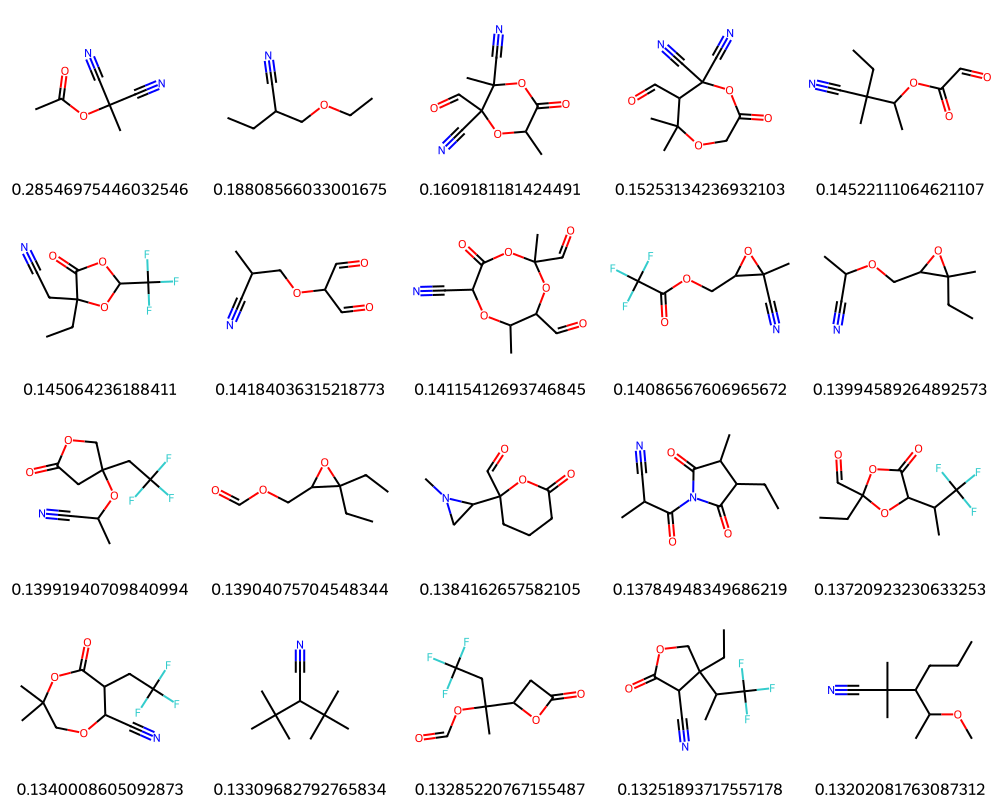

In [54]:
PandasTools.FrameToGridImage(high_score_df_4_.iloc[:20,:], legendsCol="overall_score_4", molsPerRow=5)

In [55]:
high_score_df_4_.drop(labels=['ROMol','overall_score_1','overall_score_2','overall_score_3'], axis=1, inplace=True)
high_score_df_4_.reset_index(drop=True, inplace=True)
high_score_df_4_.to_csv('gdb_high_overall_score_wt4.csv')

**Checking for 1 M electrolyte predictions - not used in final manuscript**

not done till now

In [3]:
df_emol = pd.read_csv('preds_cond_emolecules_screened_021124.csv')
df_emol_ce = pd.read_csv('preds_ce_emol_screened_021124.csv')
df_emol_os = pd.read_csv('preds_oxstab_emolecules_screened_021124.csv')

In [4]:
## reading original datasets
df_cond = pd.read_csv('all_multi_comp_cond_comm.csv')
df_cond['conductivity'] = np.power(10, df_cond['conductivity_log'])
cond = df_cond['conductivity']
df_os = pd.read_csv('all_oxstab.csv')
oxstab = df_os['IE']
df_ce = pd.read_csv('all_multi_comp_ce.csv')
ce = df_ce['coulombic_efficiency']
df_ce

,solvent_1_smiles,solvent_2_smiles,solvent_3_smiles,salt_1_smiles,salt_2_smiles,additive_smiles,protocol,current_density,coulombic_efficiency
0,CC1COC(=O)O1,NaN,NaN,[Li+].[O-][Cl+3]([O-])([O-])[O-],NaN,NaN,0,2.0,0.80000
1,CC1COC(=O)O1,NaN,NaN,[Li+].[O-][Cl+3]([O-])([O-])[O-],NaN,O=S=O,1,5.0,0.83600
2,C1CCOC1,NaN,NaN,F[As-](F)(F)(F)(F)F.[Li+],NaN,NaN,1,5.0,0.89400
3,CC1CCCO1,NaN,NaN,F[As-](F)(F)(F)(F)F.[Li+],NaN,NaN,1,0.9,0.97400
4,CC1CCCO1,NaN,NaN,F[As-](F)(F)(F)(F)F.[Li+],NaN,NaN,1,0.9,0.97400
...,...,...,...,...,...,...,...,...,...
137,CO[Si](C)(C)OC,NaN,NaN,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],NaN,NaN,2,0.5,0.99759
138,O=S1(=O)CCCC1,NaN,NaN,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],NaN,NaN,2,0.5,0.98200
139,O=S1(=O)CCCC1,FC(F)C(F)(F)COC(F)(F)C(F)F,NaN,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],NaN,NaN,2,0.5,0.98800
140,COC1OCC(C(F)(F)F)O1,NaN,NaN,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],NaN,NaN,2,1.0,0.98700


In [5]:
df_emol['conductivity'] = np.power(10, df_emol['conductivity_log'])
df_emol['coulombic_efficiency'] = 1 - np.power(10, df_emol_ce['log(1-CE)'])
df_emol['oxstab'] = df_emol_os['IE']
df_emol

,solv_comb_sm,salt_sm,conductivity_log,conductivity_log_ensemble_uncal_var,conductivity,coulombic_efficiency,oxstab
0,CC(=O)C#N,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.496380,0.061641,3.136031,0.992383,7.488391
1,CC(=O)C=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.323279,0.041828,2.105130,0.997375,6.355432
2,O=C1CCO1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,1.138788,0.004402,13.765388,0.964965,6.973953
3,CCCC=O,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.869589,0.005092,7.406098,0.988669,5.978584
4,O=CC1CO1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.713039,0.014474,5.164625,0.991071,6.796157
...,...,...,...,...,...,...,...
76599,C(CP(C1CCCCC1)C1CCCCC1)CP(C1CCCCC1)C1CCCCC1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.068743,0.022824,0.853606,0.926191,3.913700
76600,ClCC(CCl)OP(=O)(OC(CCl)CCl)OC(CCl)CCl,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.917413,0.089262,0.120945,0.962381,5.937648
76601,C(CCP(C1CCCCC1)C1CCCCC1)CP(C1CCCCC1)C1CCCCC1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.194676,0.028547,0.638740,0.923302,3.916934
76602,S=P(N1CC1)(N1CC1)N1CCN(CC1)P(=S)(N1CC1)N1CC1,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.232416,0.037728,1.707718,0.984529,4.147219


In [6]:
emol_cond = df_emol['conductivity']
emol_os = df_emol['oxstab']
emol_ce = df_emol['coulombic_efficiency']

In [7]:
## Extreme values of all predicted properties for emolecules dataset
print(max(emol_cond), min(emol_cond))
print(max(emol_os), min(emol_os))
print(max(emol_ce), min(emol_ce))

20.587940173630717 0.0008362898341019088
8.790046848261573 2.6710439932569585
0.9999999967894386 0.3782630299241635


In [8]:
## Define a scaler for conductivity
cond_div = np.linspace(max(cond), min(cond),1000000) ## dividing the range into 1 million points
cond_div = cond_div.reshape(-1, 1)
scaler_cond = preprocessing.MinMaxScaler() ## Using MinMax Scaler
scaler_cond.fit(cond_div)
cond_sc = scaler_cond.transform(cond_div)
cond_sc

array([[1.000000e+00],
       [9.999990e-01],
       [9.999980e-01],
       ...,
       [2.000002e-06],
       [1.000001e-06],
       [0.000000e+00]])

In [9]:
## Standardize the original conductivity values
emol_cond = np.array(emol_cond).reshape(-1,1)
emol_cond_sc = scaler_cond.transform(emol_cond)
print(emol_cond_sc)
print(max(emol_cond_sc), min(emol_cond_sc))

[[0.0469536 ]
 [0.03151864]
 [0.20609953]
 ...
 [0.00956341]
 [0.02556846]
 [0.0101952 ]]
[0.30824884] [1.25185033e-05]


In [10]:
## Define a scaler for oxidative stability
os_div = np.linspace(max(oxstab), min(oxstab),1000000).reshape(-1, 1)
scaler_os = preprocessing.MinMaxScaler()
scaler_os.fit(os_div)
scaler_os.transform(os_div)

array([[1.000000e+00],
       [9.999990e-01],
       [9.999980e-01],
       ...,
       [2.000002e-06],
       [1.000001e-06],
       [0.000000e+00]])

In [13]:
## Standardize the original oxidative stability values
emol_os = np.array(emol_os).reshape(-1,1)
emol_os_sc = scaler_os.transform(emol_os)
print(emol_os_sc)
print(max(emol_os_sc), min(emol_os_sc))

[[0.67783342]
 [0.57490446]
 [0.63109692]
 ...
 [0.35336789]
 [0.37428914]
 [0.47554579]]
[0.79608833] [0.24017923]


In [11]:
## Define a scaler for coulombic efficiency
ce_div = np.linspace(max(ce), min(ce),1000000).reshape(-1, 1)
scaler_ce = preprocessing.MinMaxScaler()
scaler_ce.fit(ce_div)
scaler_ce.transform(ce_div)

array([[1.000000e+00],
       [9.999990e-01],
       [9.999980e-01],
       ...,
       [2.000002e-06],
       [1.000001e-06],
       [0.000000e+00]])

In [12]:
## Standardize the original coulombic efficiency values
emol_ce = np.array(emol_ce).reshape(-1,1)
emol_ce_sc = scaler_ce.transform(emol_ce)
print(emol_ce_sc)
print(max(emol_ce_sc), min(emol_ce_sc))

[[0.99228412]
 [0.99777288]
 [0.96213462]
 ...
 [0.91632078]
 [0.98364717]
 [0.97441849]]
[1.00065977] [0.31698156]


In [14]:
## Combine the standardized values into a dataframe
target_df = pd.DataFrame()
target_df['solv_comb_sm'] = df_emol['solv_comb_sm']
target_df['conductivity'] = df_emol['conductivity']
target_df['oxstab'] = df_emol['oxstab']
target_df['coulombic_efficiency'] = df_emol['coulombic_efficiency']
# target_df['similarity'] = emol_max_sim
target_df

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency
0,CC(=O)C#N,3.136031,7.488391,0.992383
1,CC(=O)C=O,2.105130,6.355432,0.997375
2,O=C1CCO1,13.765388,6.973953,0.964965
3,CCCC=O,7.406098,5.978584,0.988669
4,O=CC1CO1,5.164625,6.796157,0.991071
...,...,...,...,...
76599,C(CP(C1CCCCC1)C1CCCCC1)CP(C1CCCCC1)C1CCCCC1,0.853606,3.913700,0.926191
76600,ClCC(CCl)OP(=O)(OC(CCl)CCl)OC(CCl)CCl,0.120945,5.937648,0.962381
76601,C(CCP(C1CCCCC1)C1CCCCC1)CP(C1CCCCC1)C1CCCCC1,0.638740,3.916934,0.923302
76602,S=P(N1CC1)(N1CC1)N1CCN(CC1)P(=S)(N1CC1)N1CC1,1.707718,4.147219,0.984529


In [15]:
target_df['cond_std'] = emol_cond_sc
target_df['oxstab_std'] = emol_os_sc
target_df['CE_std'] = emol_ce_sc

In [16]:
target_df.loc[target_df['solv_comb_sm'] == 'CCN1CCOCC1'] ## EM

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std
853,CCN1CCOCC1,7.207945,3.867303,0.972619,0.10792,0.348859,0.970551


In [17]:
target_df.loc[target_df['solv_comb_sm'] == 'COC(=O)C#N'] ## MCF

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std
74,COC(=O)C#N,13.934594,7.942341,0.989588,0.208633,0.719075,0.989211


In [18]:
target_df.loc[target_df['solv_comb_sm'] == 'CCS(F)(=O)=O'] ## ESF

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std
2651,CCS(F)(=O)=O,5.376645,7.197885,0.993486,0.080501,0.651441,0.993497


In [19]:
target_df.loc[target_df['solv_comb_sm'] == 'CCOCCS(F)(=O)=O'] ## EESF

,solv_comb_sm,conductivity,oxstab,coulombic_efficiency,cond_std,oxstab_std,CE_std
7456,CCOCCS(F)(=O)=O,3.689972,6.861181,0.988739,0.055247,0.620852,0.988276
